In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
#%matplotlib notebook

model = load_model('i_predict CD_3D+O2dist')

In [2]:
sc = StandardScaler()

In [3]:
df_aa = pd.read_csv('CD_3D+O2dist 0.4-0.9V_std', usecols=[1,2,3,4,5,6])

In [4]:
df_a = df_aa.head(7225)
df_a

,x座標,y座標,z座標,V[V],i[A/m^2],c[mol/m^3]
0,1.452284,1.426678,-0.420710,-1.581139,1.655983,-0.921826
1,1.452284,1.454113,-0.420710,-1.581139,1.660722,-0.921826
2,1.452284,1.454113,-0.516815,-1.581139,1.689053,-0.921826
3,1.228969,1.481547,-0.516815,-1.581139,1.740024,-0.921826
4,1.340626,1.481547,-0.516815,-1.581139,1.716122,-0.921826
...,...,...,...,...,...,...
7220,-1.004183,-1.481418,-0.805130,-1.581139,2.209276,-0.921826
7221,-1.004183,-1.481418,-0.901235,-1.581139,2.209344,-0.921826
7222,-0.892526,-1.453983,-0.901235,-1.581139,2.195487,-0.921826
7223,-0.892526,-1.481418,-0.805130,-1.581139,2.196820,-0.921826


In [5]:
df_ab = pd.read_csv('CD_3D+O2dist 0.4-0.9V', usecols=[1,2,3,4,5,6])
df_c  = df_ab.head(7225)
df_c

,x座標,y座標,z座標,V[V],i[A/m^2],c[mol/m^3]
0,0.000800,0.010441,0.000633,0.4,27966.558421,0.0
1,0.000800,0.010540,0.000633,0.4,28018.444979,0.0
2,0.000800,0.010540,0.000617,0.4,28328.592610,0.0
3,0.000738,0.010638,0.000617,0.4,28886.594133,0.0
4,0.000769,0.010638,0.000617,0.4,28624.930799,0.0
...,...,...,...,...,...,...
7220,0.000123,0.000000,0.000567,0.4,34023.724907,0.0
7221,0.000123,0.000000,0.000550,0.4,34024.467848,0.0
7222,0.000154,0.000099,0.000550,0.4,33872.768657,0.0
7223,0.000154,0.000000,0.000567,0.4,33887.366289,0.0


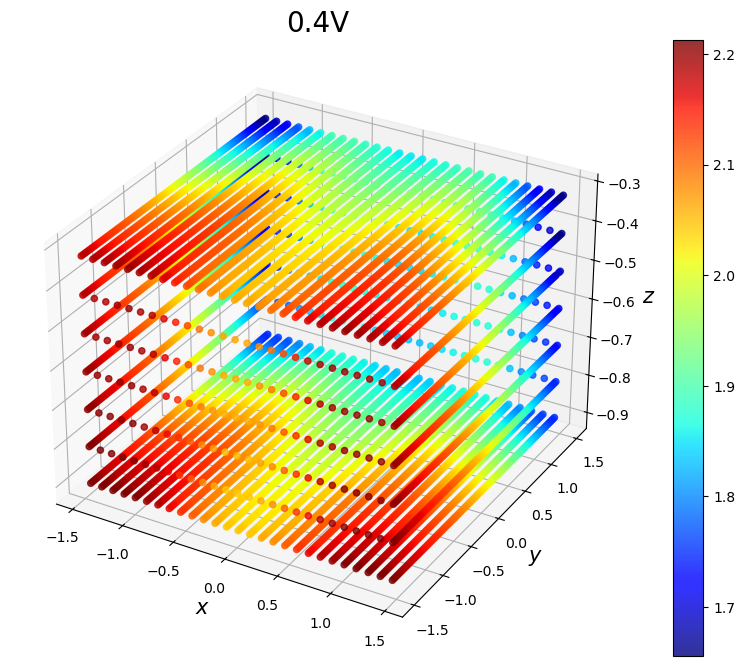

In [6]:
#正規化されてるグラフ
fig1 = plt.figure(figsize=(12, 8))
ax1 = fig1.add_subplot(111, projection='3d')

sc1 = ax1.scatter3D(df_a['x座標'], df_a['y座標'],df_a['z座標'], c=df_a['i[A/m^2]'], cmap='jet', alpha=0.8) 
plt.colorbar(sc1)

ax1.set_title("0.4V", fontsize=20)
ax1.set_xlabel('$x$', fontsize=15)
ax1.set_ylabel('$y$', fontsize=15)
ax1.set_zlabel('$z$', fontsize=15)

plt.show()

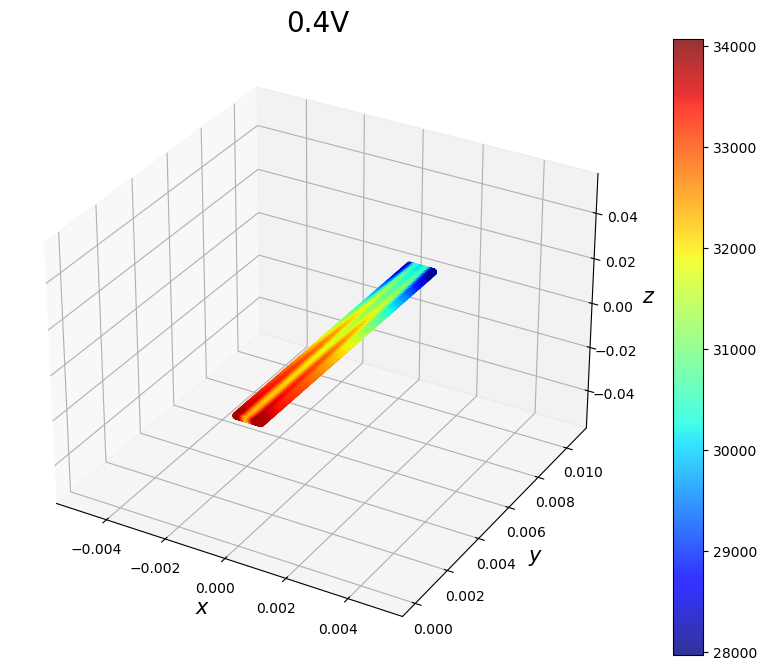

In [7]:
#正規化されてないグラフ
fig2 = plt.figure(figsize=(12, 8))
ax2 = fig2.add_subplot(111, projection='3d')

sc2 = ax2.scatter(df_c['x座標'], df_c['y座標'],df_c['z座標'], c=df_c['i[A/m^2]'], cmap='jet', alpha=0.8)
plt.colorbar(sc2)

ax2.set_title("0.4V", fontsize=20)
ax2.set_xlabel('$x$', fontsize=15)
ax2.set_ylabel('$y$', fontsize=15)
ax2.set_zlabel('$z$', fontsize=15)

ax2.set_xlim(-0.0055,0.0055)
#ax2.set_ylim(0,0.015)
ax2.set_zlim(-0.055,0.055)

plt.savefig('PEM_CD_COMSOL.png')
plt.show()

In [8]:
df_v = df_aa.loc[:,'V[V]']
v_mean = df_v.mean()
v_std = df_v.std()
print(v_mean)
print(v_std)

-7.17642754996829e-16
1.000003491418993


In [9]:
#predictで正規化された出力求める→全てのパラメータを正規化から戻す

In [10]:
#v_a =   np.array(v)*v_std + v_mean 

In [11]:
#v_a

In [12]:
df_V = pd.DataFrame([0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9])
print(df_V.mean())
print(df_V.std())

0    0.65
dtype: float64
0    0.165831
dtype: float64


In [13]:
V_pre = (0.42-df_V.mean())/df_V.std()
V_pre

0   -1.386952
dtype: float64

In [14]:
df_pre = pd.read_csv('CD_3D+O2dist 0.4-0.9V_std', usecols=[1,2,3])

In [15]:
df_pre = df_pre.head(7225)
df_pre

,x座標,y座標,z座標
0,1.452284,1.426678,-0.420710
1,1.452284,1.454113,-0.420710
2,1.452284,1.454113,-0.516815
3,1.228969,1.481547,-0.516815
4,1.340626,1.481547,-0.516815
...,...,...,...
7220,-1.004183,-1.481418,-0.805130
7221,-1.004183,-1.481418,-0.901235
7222,-0.892526,-1.453983,-0.901235
7223,-0.892526,-1.481418,-0.805130


In [16]:
df_pre.insert(3, 'V[V]', -1.386952) 
df_pre

,x座標,y座標,z座標,V[V]
0,1.452284,1.426678,-0.420710,-1.386952
1,1.452284,1.454113,-0.420710,-1.386952
2,1.452284,1.454113,-0.516815,-1.386952
3,1.228969,1.481547,-0.516815,-1.386952
4,1.340626,1.481547,-0.516815,-1.386952
...,...,...,...,...
7220,-1.004183,-1.481418,-0.805130,-1.386952
7221,-1.004183,-1.481418,-0.901235,-1.386952
7222,-0.892526,-1.453983,-0.901235,-1.386952
7223,-0.892526,-1.481418,-0.805130,-1.386952


In [17]:
df_i_pre = pd.DataFrame(model.predict(df_pre), columns = ['i[A/m^2]','c[mol/m^3]'])

226/226 [==============================] - 1s 3ms/step


In [18]:
df_i_pre

,i[A/m^2],c[mol/m^3]
0,1.602161,-0.924464
1,1.595955,-0.924395
2,1.604998,-0.920159
3,1.635235,-0.921726
4,1.616072,-0.920769
...,...,...
7220,2.013508,-0.922479
7221,2.029206,-0.923837
7222,2.010319,-0.923862
7223,1.995906,-0.922441


In [19]:
df = pd.concat([df_pre, df_i_pre], axis=1)

In [20]:
df_b = df.head(7225)
df_b

,x座標,y座標,z座標,V[V],i[A/m^2],c[mol/m^3]
0,1.452284,1.426678,-0.420710,-1.386952,1.602161,-0.924464
1,1.452284,1.454113,-0.420710,-1.386952,1.595955,-0.924395
2,1.452284,1.454113,-0.516815,-1.386952,1.604998,-0.920159
3,1.228969,1.481547,-0.516815,-1.386952,1.635235,-0.921726
4,1.340626,1.481547,-0.516815,-1.386952,1.616072,-0.920769
...,...,...,...,...,...,...
7220,-1.004183,-1.481418,-0.805130,-1.386952,2.013508,-0.922479
7221,-1.004183,-1.481418,-0.901235,-1.386952,2.029206,-0.923837
7222,-0.892526,-1.453983,-0.901235,-1.386952,2.010319,-0.923862
7223,-0.892526,-1.481418,-0.805130,-1.386952,1.995906,-0.922441


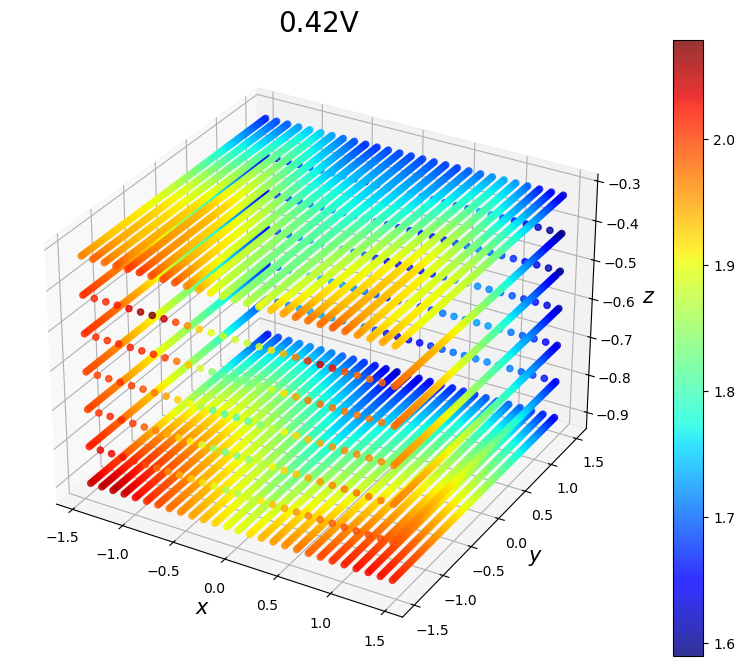

In [21]:
fig3 = plt.figure(figsize=(12, 8))
ax3 = fig3.add_subplot(111, projection='3d')

sc3 = ax3.scatter(df_b['x座標'], df_b['y座標'],df_b['z座標'], c=df_b['i[A/m^2]'], cmap='jet', alpha=0.8)
plt.colorbar(sc3)

ax3.set_title("0.42V", fontsize=20)
ax3.set_xlabel('$x$', fontsize=15)
ax3.set_ylabel('$y$', fontsize=15)
ax3.set_zlabel('$z$', fontsize=15)


plt.show()
#plt.savefig('PEM_CD_Predict_stdL.png')

In [22]:
df_i = pd.read_csv('CD_3D+O2dist 0.4-0.9V', usecols=[5])

In [23]:
df_i.mean()

i[A/m^2]    9837.709987
dtype: float64

In [24]:
df_i.std()

i[A/m^2]    10947.523768
dtype: float64

In [25]:
df_i_re = (df_i_pre*df_i.std() + df_i.mean() ).head(7225) #iの予測値の標準化を戻す
df_i_re

,c[mol/m^3],i[A/m^2]
0,NaN,27377.400939
1,NaN,27309.469352
2,NaN,27408.462352
3,NaN,27739.480879
4,NaN,27529.699869
...,...,...
7220,NaN,31880.634954
7221,NaN,32052.491312
7222,NaN,31845.727570
7223,NaN,31687.934394


In [26]:
df_i_re_c = df_i_re.head(7225)

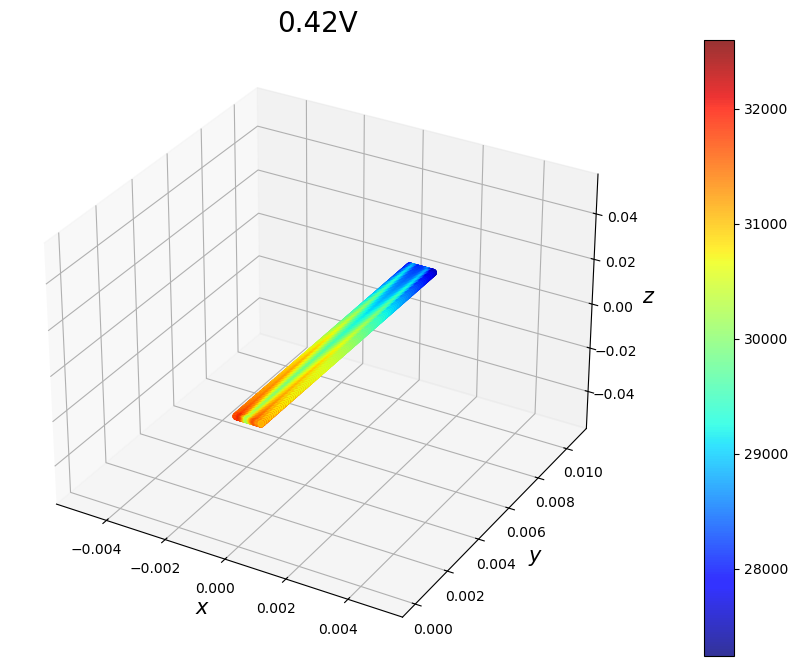

In [27]:
fig4 = plt.figure(figsize=(20, 8))
ax4 = fig4.add_subplot(111, projection='3d')

sc4 = ax4.scatter(df_c['x座標'], df_c['y座標'], df_c['z座標'],c=df_i_re_c['i[A/m^2]'], cmap='jet', alpha=0.8)
plt.colorbar(sc4)

ax4.set_title("0.42V", fontsize=20)
ax4.set_xlabel('$x$', fontsize=15)
ax4.set_ylabel('$y$', fontsize=15)
ax4.set_zlabel('$z$', fontsize=15)

ax4.set_xlim(-0.0055,0.0055)
ax4.set_zlim(-0.055,0.055)
plt.savefig('PEM_CD_Predict_0.42V.png')
plt.show()

In [28]:
df_d = pd.read_excel('/Users/aruhy/OneDrive/デスクトップ/data/10-26/CD_3D 0.42V.xlsx',names=['x座標','y座標','z座標','i[A/m^2]'] ,header=8) 

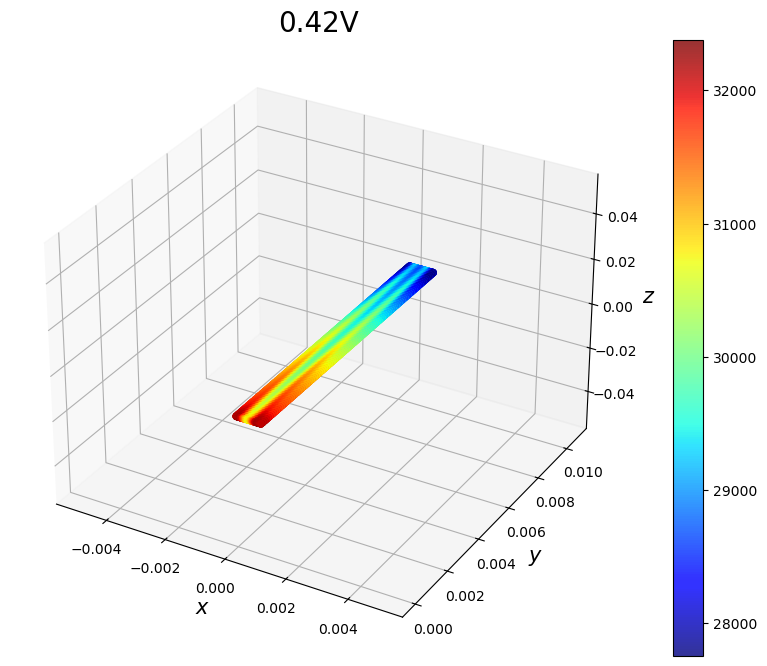

In [29]:
#COMSOLの結果
fig5 = plt.figure(figsize=(12, 8))
ax5 = fig5.add_subplot(111, projection='3d')

sc5 = ax5.scatter(df_d['x座標'], df_d['y座標'],df_d['z座標'], c=df_d['i[A/m^2]'], cmap='jet', alpha=0.8)
plt.colorbar(sc5)

ax5.set_title("0.42V", fontsize=20)
ax5.set_xlabel('$x$', fontsize=15)
ax5.set_ylabel('$y$', fontsize=15)
ax5.set_zlabel('$z$', fontsize=15)

ax5.set_xlim(-0.0055,0.0055)
#ax5.set_ylim(0,0.015)
ax5.set_zlim(-0.055,0.055)

plt.savefig('PEM_CD_COMSOL_0.42V.png')
plt.show()

In [ ]:
df7 = df_aa.drop(['i[A/m^2]'], axis=1)
df8 = pd.DataFrame(model.predict(df7)) 